# Problem 1

(25 pts) Independent binding sites. A common method of removal of viral and bacterial pathogens is through opsonization. Antibodies can bind viral/bacterial surfaces noncovalently. If enough antibodies bind, the antibody/pathogen complex is recognized by macrophages and engulfed, destroying the pathogen. Let’s consider a simplified case study to understand the effective concentrations of antibodies needed for pathogen neutralization. This is a multi-part problem. 

Consider human adenovirus 41 [Science](https://www.science.org/doi/10.1126/sciadv.abe0974) – this virus has 12 vertexes where antibodies can bind independently. Binding at 8 of these vertexes is sufficient for opsonization by macrophages – e.g. a virus bound by 7 antibodies will not be opsonized, but one bound by 8 to 12 antibodies will be opsonized. Find the specific antibody concentration (in units of $\mu$ g/mL) needed to remove 99.5% of the viruses through opsonization. Assume that the concentration of the virus is much lower than the concentration of antibodies, and that the effective dissociation constant for binding a vertex in isolation is given as $K_d^{\mu}=10 nM$ . Make the limiting assumption that only one arm of the antibody can bind at a time (monovalent binding). Finally, assume that binding equilibrium is reached rapidly relative to timescales of viral cell entry and macrophage opsonization (this is probably not a great assumption but one we’ll make for simplicity).


## Problem 1a

Antibody titers (concentrations) are often reported in units of $\mu$ g/mL. Convert 100 nM of antibody to units of $\mu$ g/mL. Assume that antibodies have an average molecular weight of 150 kDa.

$ 100 nM = 1\times 10^{-7} mol/L$

$ 150 kDa \cdot 1000 g/mol = 150000 g/mol $

$ 1\times 10^{-7} mol/L \times 150000 g/mol = 1.5x10^{-2} g/L = 15 \mu g / mL$ 

# Problem 1b.	

Plot the fractional saturation as a function of antibody concentration in units of $\mu$ g/mL. Identify the concentration where the fractional saturation is 0.995. This portion is independent of parts c & d.

<>:80: SyntaxWarning: invalid escape sequence '\C'
<>:80: SyntaxWarning: invalid escape sequence '\C'
/var/folders/f2/lbj2f9h979b75rj33ps9wq780000gn/T/ipykernel_10632/1508085374.py:80: SyntaxWarning: invalid escape sequence '\C'
  print("\Concentration for θ = 0.995:")


Kd = 10 nM = 1.500 µg/mL


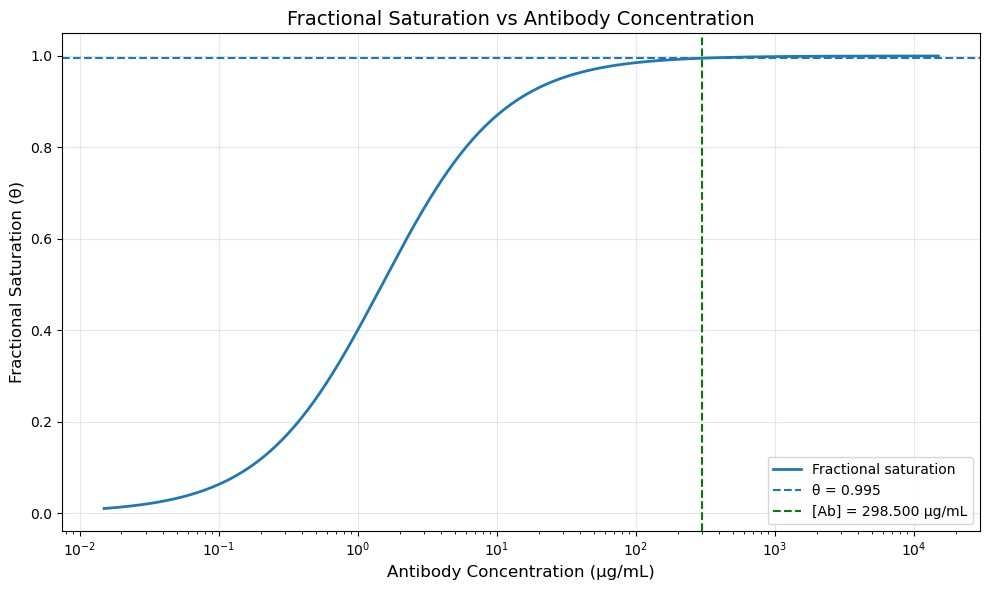

\Concentration for θ = 0.995:
  [Ab] = 1990.00 nM
  [Ab] = 298.500 µg/mL


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# Constants
# ==============================

Kd_nM = 10                  # Dissociation constant (K_d^\mu nM)
MW_antibody = 150000        # Antibody molecular weight (g/mol) ~150 kDa

# Convert Kd to µg/mL
# nM -> mol/L (1e-9)
# mol/L -> g/L (x MW)
# g/L -> µg/mL (x 1000)
Kd_ugml = Kd_nM * MW_antibody * 1e-6

print(f"Kd = {Kd_nM} nM = {Kd_ugml:.3f} µg/mL")

# ==============================
# Fractional saturation
# ==============================

# Antibody concentration range
Ab_conc_nM = np.logspace(-1, 5, 1000)   # 0.1 to 10^5 nM

# Convert to µg/mL
Ab_conc_ugml = Ab_conc_nM * MW_antibody * 1e-6

# Fractional saturation (independent binding)
theta = Ab_conc_nM / (Kd_nM + Ab_conc_nM)

# ==============================
# Plot
# ==============================

plt.figure(figsize=(10,6))

plt.semilogx(
    Ab_conc_ugml,
    theta,
    linewidth=2,
    label='Fractional saturation'
)

# Horizontal line at theta = 0.995
plt.axhline(
    y=0.995,
    linestyle='--',
    label='θ = 0.995'
)

# Calculate concentration for target saturation
theta_target = 0.995

Ab_nM_at_target = theta_target * Kd_nM / (1 - theta_target)
Ab_ugml_at_target = Ab_nM_at_target * MW_antibody * 1e-6

# Vertical line
plt.axvline(
    x=Ab_ugml_at_target,
    linestyle='--',
    label=f'[Ab] = {Ab_ugml_at_target:.3f} µg/mL',
    color='green'
)

# Labels and formatting
plt.xlabel('Antibody Concentration (µg/mL)', fontsize=12)
plt.ylabel('Fractional Saturation (θ)', fontsize=12)
plt.title('Fractional Saturation vs Antibody Concentration', fontsize=14)

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# ==============================
# Output
# ==============================

print("\Concentration for θ = 0.995:")
print(f"  [Ab] = {Ab_nM_at_target:.2f} nM")
print(f"  [Ab] = {Ab_ugml_at_target:.3f} µg/mL")


# Problem 1c. 

Write a single algebraic expression relating the % removal of viruses to the antibody concentration. This should be a single equation with % removal of viruses on the left-hand side and antibody concentration on the right-hand side.

In [2]:
# For a virus with n=12 binding sites, we need at least m=8 bound for opsonization
# Probability that exactly k sites are bound follows binomial distribution
# P(k bound) = C(n,k) * θ^k * (1-θ)^(n-k)
# % removal = P(k >= 8) = sum from k=8 to 12 of P(k)

n = 12  # total binding sites
m = 8   # minimum for opsonization

print(f"\nFor virus with n={n} binding sites, need at least m={m} bound")
print(f"\nFractional saturation: θ = [Ab]/(Kd + [Ab])")
print(f"\nProbability of exactly k sites bound: P(k) = C(n,k) × θ^k × (1-θ)^(n-k)")
print(f"\n% Removal = 100 × Σ(k={m} to {n}) C({n},k) × θ^k × (1-θ)^({n}-k)")
print(f"\nSubstituting θ = [Ab]/(Kd + [Ab]):")
print(f"\n% Removal = 100 × Σ(k={m} to {n}) C({n},k) × ([Ab]/(Kd + [Ab]))^k × (Kd/(Kd + [Ab]))^({n}-k)")


For virus with n=12 binding sites, need at least m=8 bound

Fractional saturation: θ = [Ab]/(Kd + [Ab])

Probability of exactly k sites bound: P(k) = C(n,k) × θ^k × (1-θ)^(n-k)

% Removal = 100 × Σ(k=8 to 12) C(12,k) × θ^k × (1-θ)^(12-k)

Substituting θ = [Ab]/(Kd + [Ab]):

% Removal = 100 × Σ(k=8 to 12) C(12,k) × ([Ab]/(Kd + [Ab]))^k × (Kd/(Kd + [Ab]))^(12-k)


# Problem 1d

Identify the concentration of antibodies needed for removal 99.5% of the viruses through opsonization. Compare with the value reported in part b. 

[Ab] = 86.75 nM = 1.301302e-05 g/mL
Verification: % removal = 99.50%


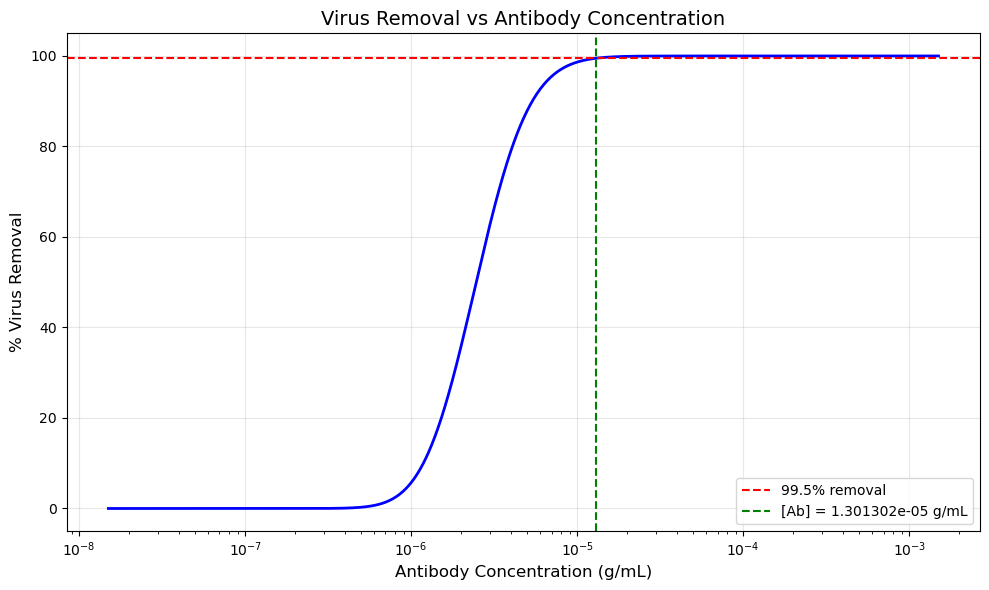

In [6]:

from scipy.optimize import fsolve
from math import comb

def percent_removal(Ab_nM, Kd=Kd_nM, n=12, m=8):
    """Calculate % removal of viruses"""
    theta = Ab_nM / (Kd + Ab_nM)
    prob_opsonized = sum([comb(n, k) * theta**k * (1-theta)**(n-k) 
                          for k in range(m, n+1)])
    return 100 * prob_opsonized

# Find antibody concentration for 99.5% removal
target_removal = 99.5

def equation(Ab_nM):
    return percent_removal(Ab_nM) - target_removal

import scipy.optimize as optimize

Ab_nM_solution = fsolve(equation, 100)[0]
Ab_gml_solution = Ab_nM_solution * 1e-9 * MW_antibody / 1000

print(f"[Ab] = {Ab_nM_solution:.2f} nM = {Ab_gml_solution:.6e} g/mL")
print(f"Verification: % removal = {percent_removal(Ab_nM_solution):.2f}%")

# Compare with Part b
# print(f"\nComparison:")
# print(f"  Part b (θ = 0.995): [Ab] = {Ab_nM_at_target:.2f} nM = {Ab_gml_at_target:.6e} g/mL")
# print(f"  Part d (99.5% removal): [Ab] = {Ab_nM_solution:.2f} nM = {Ab_gml_solution:.6e} g/mL")
# print(f"  Ratio (Part d / Part b): {Ab_nM_solution/Ab_nM_at_target:.2f}")

# Plot % removal vs concentration
Ab_range_nM = np.logspace(-1, 4, 1000)
removal = [percent_removal(Ab) for Ab in Ab_range_nM]
Ab_range_gml = Ab_range_nM * 1e-9 * MW_antibody / 1000

plt.figure(figsize=(10, 6))
plt.semilogx(Ab_range_gml, removal, 'b-', linewidth=2)
plt.axhline(y=99.5, color='r', linestyle='--', label='99.5% removal')
plt.axvline(x=Ab_gml_solution, color='g', linestyle='--', 
            label=f'[Ab] = {Ab_gml_solution:.6e} g/mL')
plt.xlabel('Antibody Concentration (g/mL)', fontsize=12)
plt.ylabel('% Virus Removal', fontsize=12)
plt.title('Virus Removal vs Antibody Concentration', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()